<a href="https://colab.research.google.com/github/1C0DER/AAI-Repo/blob/master/Joan_AAI_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Section 1: Dataset description

The dataset used for this project contains tweets that are labeled with different sentiment categories which are:

a. Positive

b. Negative

c. Neutral

The tweets are collected from different social media platforms which reflect a wide range of users' opinions, making it a very diverse source for sentiment analysis. The primary task is to train a machine learning model that can predict the categories based on the data text.

To prepare the dataset:

1. The dataset will be loaded into a pandas Dataframe

2. Then it will be explored to understand its structure, checking for missing values, class distributions and its general statistics

3. Preprocessing: Containing steps like:

a. Text Cleaning: Removal of unecessary punctuation, special characters and stopwords due to the casual and often cluttered nature of tweet language, which frequently includes slang, hashtags, and abbreviations

b. Tokenization: Breaking down text into individual words

c. Lowercasing: To maintain uniformity all text willl be converted to lowercase

d. Vectorization: Transforming the text into numerical representations (e.g., TF-IDF) to enable machine learning algorithms to process it.

By the end of this section, the dataset will be clean and ready for use in the subsequent stages of the model comparison.


In [40]:
import numpy as np #import numpy to enable array functionality
import pandas as pd #import pandas to enable dataframe functionality
import io #io we use to load the data after uploading (as colab uses dictionaries to store uploaded files)
from google.colab import files #finally, we import the files package from google.colab framework to be able to upload files

uploaded = files.upload()

Saving train.csv to train.csv


In [41]:
tweet_file = io.BytesIO(uploaded['train.csv'])
tweet_df = pd.read_csv(tweet_file)
print(tweet_df) # This prints the loaded df into the console

           textID                                               text  \
0      cb774db0d1                I`d have responded, if I were going   
1      549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2      088c60f138                          my boss is bullying me...   
3      9642c003ef                     what interview! leave me alone   
4      358bd9e861   Sons of ****, why couldn`t they put them on t...   
...           ...                                                ...   
27476  4eac33d1c0   wish we could come see u on Denver  husband l...   
27477  4f4c4fc327   I`ve wondered about rake to.  The client has ...   
27478  f67aae2310   Yay good for both of you. Enjoy the break - y...   
27479  ed167662a5                         But it was worth it  ****.   
27480  6f7127d9d7     All this flirting going on - The ATG smiles...   

                                           selected_text sentiment  
0                    I`d have responded, if I were going   neutral

In [42]:
tweet_df.info() #checking the general info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [43]:
# Check for missing values in each column
tweet_df.isnull().sum()

,0
textID,0
text,1
selected_text,1
sentiment,0


In [44]:
# Drop rows with any missing values
tweet_df.dropna(inplace=True)

In [45]:
# Check for missing values in each column
tweet_df.isnull().sum()

,0
textID,0
text,0
selected_text,0
sentiment,0


<Axes: xlabel='sentiment', ylabel='count'>

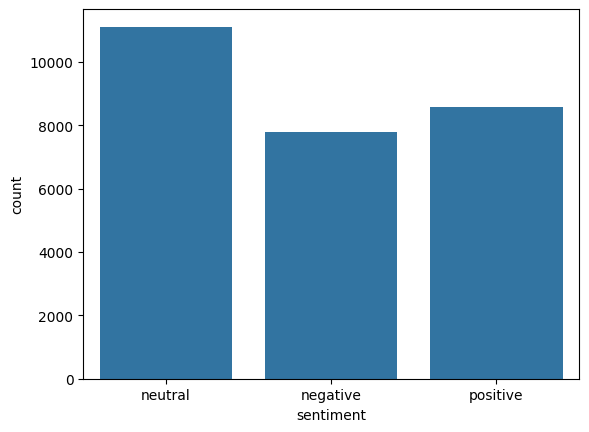

In [46]:
import seaborn as sns # Import the seaborn library and alias it as 'sns'
sns.countplot(tweet_df, x='sentiment') # Use tweet_df instead of train_df

In [47]:
import nltk #import the natural language toolkit
import re

nltk.download('punkt') #download the package in nltk which supports tokenization
nltk.download('stopwords') #download the nltk package for stopwords

from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer for converting text into TF-IDF features
from nltk.corpus import stopwords #import the package from the corpus
from nltk.stem import PorterStemmer #import the snowball stemmer (also known as Porter2)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
def clean_text(text):
    # Remove URLs, mentions, and hashtags
    text = re.sub(r'http\S+|www\S+|@\S+|#\S+', '', text)
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

In [49]:
# Apply the cleaning function to the 'text' and 'selected_text' columns
tweet_df['text_cleaned'] = tweet_df['text'].apply(clean_text)
tweet_df['selected_text_cleaned'] = tweet_df['selected_text'].apply(clean_text)

In [50]:
from collections import Counter # Import the Counter class from collections

# Initialize the Counter object with the tokenized text
ct = Counter(" ".join(tweet_df["text_cleaned"]).split()) # Assuming 'text_cleaned' column contains the cleaned text

# Now you can use ct to get the most common words
dict(ct.most_common(100))

{'i': 13179,
 'to': 10015,
 'the': 8985,
 'a': 6789,
 'my': 5512,
 'and': 5070,
 'you': 4813,
 'it': 4062,
 'is': 3973,
 'in': 3784,
 'for': 3652,
 'of': 3145,
 'im': 3055,
 'on': 2852,
 'me': 2812,
 'have': 2594,
 'so': 2577,
 'that': 2568,
 'but': 2304,
 'just': 2245,
 'with': 2094,
 'day': 2086,
 'its': 2018,
 'be': 2011,
 'at': 1888,
 'not': 1837,
 'was': 1821,
 'all': 1612,
 'this': 1550,
 'good': 1549,
 'now': 1517,
 'out': 1494,
 'up': 1465,
 'get': 1427,
 'are': 1365,
 'no': 1351,
 'like': 1346,
 'go': 1267,
 'dont': 1202,
 'your': 1167,
 'do': 1143,
 'love': 1122,
 'work': 1112,
 'too': 1107,
 'today': 1097,
 'going': 1096,
 'got': 1074,
 'cant': 1030,
 'from': 989,
 'happy': 974,
 'one': 971,
 'lol': 951,
 'am': 945,
 'time': 943,
 'know': 932,
 'u': 931,
 'what': 915,
 'really': 908,
 'will': 895,
 'back': 891,
 'about': 856,
 'had': 836,
 'we': 834,
 'there': 824,
 'see': 797,
 'can': 796,
 'some': 789,
 'if': 773,
 'well': 744,
 'night': 744,
 'new': 740,
 'mothers': 719,


In [51]:
# Pre-processing function: remove custom stopwords
def remove_stopwords(text):
    tokens = text.split()
    cleaned_tokens = [word for word in tokens if word not in custom_stopwords]
    return " ".join(cleaned_tokens)

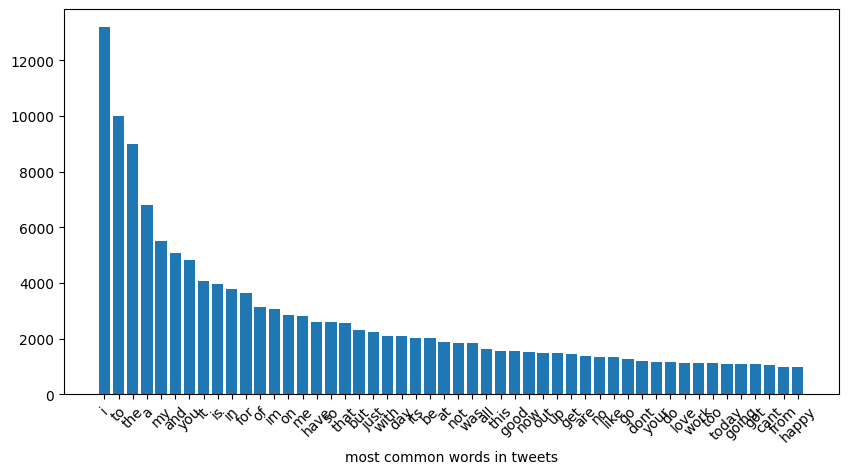

In [52]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib and alias it as 'plt'

#Distribution of 50 most common tokens

plt.figure(figsize=(10,5))

plt.bar(x=dict(ct.most_common(50)).keys(),height=dict(ct.most_common(50)).values())

plt.xticks(rotation=45)

plt.xlabel('most common words in tweets')

plt.show()

In [53]:
# Custom stopwords list
custom_stopwords = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your",
    "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she",
    "her", "hers", "herself", "it", "its", "itself", "they", "them", "their",
    "theirs", "themselves", "what", "which", "who", "whom", "this", "that",
    "these", "those", "am", "is", "are", "was", "were", "be", "been", "being",
    "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an",
    "the", "and", "but", "if", "or", "because", "as", "until", "while", "of",
    "at", "by", "for", "with", "about", "against", "between", "into", "through",
    "during", "before", "after", "above", "below", "to", "from", "up", "down",
    "in", "out", "on", "off", "over", "under", "again", "further", "then",
    "once", "here", "there", "when", "where", "why", "how", "all", "any",
    "both", "each", "few", "more", "most", "other", "some", "such", "no",
    "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s",
    "t", "can", "will", "just", "don", "should", "now", "d", "ll", "m", "o",
    "re", "ve", "y", "ain", "aren", "couldn", "didn", "doesn", "hadn",
    "hasn", "haven", "isn", "ma", "mightn", "mustn", "needn", "shan",
    "shouldn", "wasn", "weren", "won", "wouldn"
])

In [54]:
# Apply stopword removal
tweet_df['text_cleaned_no_stopwords'] = tweet_df['text_cleaned'].apply(remove_stopwords)
tweet_df['selected_text_cleaned_no_stopwords'] = tweet_df['selected_text_cleaned'].apply(remove_stopwords)

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')  # Using English stopwords from sklearn

# Vectorize the cleaned 'text' column
X_tfidf = vectorizer.fit_transform(tweet_df['text_cleaned_no_stopwords'])

# Display the cleaned data and the shape of the TF-IDF matrix
print("Sample of cleaned data:")
print(tweet_df[['text', 'text_cleaned', 'selected_text', 'selected_text_cleaned_no_stopwords']].head())

print(f"TF-IDF matrix shape: {X_tfidf.shape}")

Sample of cleaned data:
                                                text  \
0                I`d have responded, if I were going   
1      Sooo SAD I will miss you here in San Diego!!!   
2                          my boss is bullying me...   
3                     what interview! leave me alone   
4   Sons of ****, why couldn`t they put them on t...   

                                        text_cleaned  \
0                  id have responded if i were going   
1         sooo sad i will miss you here in san diego   
2                             my boss is bullying me   
3                      what interview leave me alone   
4   sons of  why couldnt they put them on the rel...   

                         selected_text selected_text_cleaned_no_stopwords  
0  I`d have responded, if I were going                 id responded going  
1                             Sooo SAD                           sooo sad  
2                          bullying me                           bullying 

In [55]:
tweet_df.head(5)

,textID,text,selected_text,sentiment,text_cleaned,selected_text_cleaned,text_cleaned_no_stopwords,selected_text_cleaned_no_stopwords
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,id have responded if i were going,id have responded if i were going,id responded going,id responded going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad i will miss you here in san diego,sooo sad,sooo sad miss san diego,sooo sad
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me,bullying me,boss bullying,bullying
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone,leave me alone,interview leave alone,leave alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,sons of why couldnt they put them on the rel...,sons of,sons couldnt put releases already bought,sons


#Section 2

In this section, the goal is to convert the text into a numerical format for machine learning algorithms. The TF-IDF (Term Frequency-Inverse Document Frequency) vectorization technique is employed, which gives weights to words based on their frequency within a document and across the entire dataset.

*   Term Frequency (TF) measures how often a word appears in a document relative to the total number of words in the same document

*  Inverse Document Frequency (IDF) measures the importance of a word by considering how often it appears across all documents. Words that appear in many documents are given lower weight, since they give less info.

By combining these, TF-IDF is an effective method for identifying key features.

In this case, TF-IDF is applied to the 'text_cleaned_no_stopwords' and 'selected_text_cleaned_no_stopwords' columns, which have been preprocessed by removing stopwords and non-alphabetic characters. The resulting vectors are now ready for use in machine learning models, providing numerical representations of the text that can be processed by algorithms for sentiment analysis or other classification tasks.

In [56]:
# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')  # 'english' stopwords from sklearn can be used along with custom ones

# Vectorize the cleaned text column without stopwords (using 'text_cleaned_no_stopwords')
X_tfidf_text = vectorizer.fit_transform(tweet_df['text_cleaned_no_stopwords'])

# Vectorize the selected text column without stopwords (using 'selected_text_cleaned_no_stopwords')
X_tfidf_selected_text = vectorizer.fit_transform(tweet_df['selected_text_cleaned_no_stopwords'])

# Display the shape of the TF-IDF matrices
print(f"TF-IDF matrix for 'text_cleaned_no_stopwords' shape: {X_tfidf_text.shape}")
print(f"TF-IDF matrix for 'selected_text_cleaned_no_stopwords' shape: {X_tfidf_selected_text.shape}")

TF-IDF matrix for 'text_cleaned_no_stopwords' shape: (27480, 26059)
TF-IDF matrix for 'selected_text_cleaned_no_stopwords' shape: (27480, 17339)


In [57]:
print(X_tfidf_text)

  (0, 10860)	0.47606233839599693
  (0, 18718)	0.8154850428690742
  (0, 9140)	0.3291637811451308
  (1, 20811)	0.4245002417840429
  (1, 19256)	0.33061361903811365
  (1, 14394)	0.31373108226408325
  (1, 19348)	0.538064461113974
  (1, 6009)	0.5679380453353569
  (2, 2703)	0.6112053120793377
  (2, 3132)	0.7914720882545381
  (3, 11284)	0.7834445624729018
  (3, 12705)	0.6214616782486618
  (4, 20795)	0.5925371516906595
  (4, 18534)	0.6646744248094097
  (4, 2727)	0.4550907962930042
  (5, 19867)	0.4787765978840259
  (5, 17225)	0.44725499799532276
  (5, 2146)	0.2503103267829346
  (5, 18169)	0.44725499799532276
  (5, 8317)	0.4157333981066197
  (5, 6764)	0.36770828772214076
  (6, 7780)	0.5541564871498404
  (6, 1562)	0.3245007346096257
  (6, 8581)	0.2627974660312698
  (6, 20575)	0.459845561667017
  :	:
  (27476, 15238)	0.2960268918952393
  (27476, 4271)	0.3178853081306342
  (27476, 4252)	0.29378271368182085
  (27476, 8259)	0.3068118141496576
  (27476, 5952)	0.3519913831056153
  (27476, 25299)	0.36609

#Section 3

1. Support Vector Machines (SVM)

Support Vector Machines (SVM) are supervised learning algorithms used for classification tasks. SVM's goal is to find the optimal hyperplane that classifies text data into categories such as positive, negative, and neutral sentiments.

SVM works by maximizing the margin between the closest points from each class, called support vectors. If the data isn't linearly separable, SVM uses a kernel trick to map the data into a higher-dimensional space where a linear boundary can be drawn.

SVM is effective in high-dimensional spaces, which is typical in text classification, making it a strong choice for sentiment analysis.

2. Multilayer Perceptrons (MLP)

These are neural networks that consist of multiple layers of neurons. Each neuron performs a weighted sum of inputs and applies an activation function to produce an output, which is passed to the next layer.

These networks use non-linear activation functions to learn complex patterns and relationships in data. While they are versatile and effective for various classification tasks, they require extensive data and computational power to train effectively and are pronw to overfitting without proper regularization.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Use the TF-IDF matrix (X_tfidf_text) and the sentiment labels (y)
X = X_tfidf_text  # TF-IDF features for 'text_cleaned_no_stopwords'
y = tweet_df['sentiment']  # Sentiment labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for SVM
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Grid Search for hyperparameter tuning
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best parameters for SVM: {grid_search.best_params_}")

# Train the model with the best parameters
svm_model = grid_search.best_estimator_

# Make predictions
y_pred = svm_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

# Initialize the MLP model
model_mlp = Sequential()
model_mlp.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer='l2'))  # L2 regularization
model_mlp.add(Dropout(0.2))  # Dropout to prevent overfitting
model_mlp.add(Dense(64, activation='relu', kernel_regularizer='l2'))  # L2 regularization
model_mlp.add(Dense(3, activation='softmax'))  # 3 classes: positive, negative, neutral
model_mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convert y_train to numerical format using LabelEncoder
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

# Convert encoded labels to one-hot encoding
y_train_onehot = np.eye(3)[y_train_encoded]

# Split the data into training and testing sets
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(X, y_numerical, test_size=0.2, random_state=42)

# Early stopping to prevent overfitting
early_stopping_mlp = EarlyStopping(monitor='val_loss', patience=3)

# Train the model using one-hot encoded labels
model_mlp.fit(X_train_mlp, y_train_onehot, epochs=10, batch_size=64, validation_data=(X_test_mlp, y_test_mlp), callbacks=[early_stopping_mlp])

# For evaluation, you'll need to encode y_test as well
y_test_encoded = encoder.transform(y_test)
y_test_onehot = np.eye(3)[y_test_encoded]

# Evaluate the model
loss, accuracy = model_mlp.evaluate(X_test_mlp, y_test_onehot)

# Section 4: Evaluation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming svm_pred and mlp_pred are already calculated:
# svm_pred = accuracy of SVM model
# mlp_pred = accuracy of MLP model

# Create a DataFrame with the accuracies
accuracy_data = pd.DataFrame({
    'Model': ['SVM', 'MLP'],
    'Accuracy': [svm_pred, mlp_pred]
})

# Plotting the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Model', y='Accuracy', data=accuracy_data, palette="Blues")
plt.title("Model Comparison: SVM vs MLP (Accuracy)")
plt.ylabel("Accuracy")
plt.show()